# outline

In [2]:
# 每次跑之前要run 一下這個block 他是幫忙抓路徑的
%cd /mnt/hdd/jeff/mdgen-teaching
import sys
sys.path.append("bin/src")
%load_ext autoreload
%autoreload 2

/mnt/hdd/jeff/mdgen-teaching


```
git clone https://github.com/32176701Jeff/mdgen-teaching.git 
ll 查看folder裡面有哪些folder / file
cd <path> 進到path
nano <path> 新增一個file 
cat <path> 查看file content
rm -f <path>
```

# 03-paper reproduction
教學檔案 : [md](/mnt/hdd/jeff/mdgen-teaching/bin/paper_reproduction.md)

# 04-environment setting
教學檔案 : [md](/mnt/hdd/jeff/mdgen-teaching/bin/environment_setting.md)

# 05-Data preprocess

## 54-code practice
542-Download : ATLAS
543-GIF : conformation
543-GIF : Dihedral angel
543-Processing : convert 10ps to 400 ps
543-Analysis : RMSD RMSF Ramachandran
547-Code : Making small datasets
548-Code : Making .npy

### 542-Download : ATLAS
這邊因為電腦的硬碟空間不足 讓他下載一兩個檔案就好 不要全部下載 可以跑就好
```
cd /mnt/hdd/jeff/mdgen-teaching/bin
./atlas.sh
```

### 543-GIF : conformation

In [ ]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import os 
import subprocess

def conformation_gif(pdb,xtc,pdb_dir,png_dir,pml_path):
    traj = md.load(xtc, top=pdb)
    for i in range(20):
        out_pdb = os.path.join(pdb_dir, f"frame_{i:04d}.pdb")
        out_png = os.path.join(png_dir,f"frame_{i:04d}.png")
        traj[i].save_pdb(out_pdb)

        cmd = [
        "pymol",
        "-cq", pml_path,
        "--",out_pdb,out_png]
        subprocess.run(cmd, check=True)
    
pdb = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/542-atlas-train/1a62_A/1a62_A.pdb'
xtc = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/542-atlas-train/1a62_A/1a62_A_prod_R1_fit.xtc'
png_dir = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-conformation/png'
pdb_dir = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-conformation/pdb'
pml_path = '/mnt/hdd/jeff/mdgen-teaching/bin/src/pdb_to_png.pml'
os.makedirs(png_dir,exist_ok=True)
os.makedirs(pdb_dir,exist_ok=True)

conformation_gif(pdb,xtc,pdb_dir,png_dir,pml_path)
    

In [ ]:
import os
import subprocess
import shutil
import tempfile

def images_to_gif_ffmpeg(png_dir, output_gif, fps=20):
    files = [f for f in os.listdir(png_dir) if f.endswith(".png")]
    files_sorted = sorted(files, key=lambda x: int((os.path.splitext(x)[0]).split('_')[1]))

    temp_dir = tempfile.mkdtemp(prefix="gif_")
    for i, name in enumerate(files_sorted):
        shutil.copy(os.path.join(png_dir, name),
                    os.path.join(temp_dir, f"{i:05d}.png"))

    pattern = os.path.join(temp_dir, "%05d.png")

    palette_path = os.path.join(temp_dir, "palette.png")

    # step1: generate palette (to preserve alpha transparency)
    subprocess.run([
        "ffmpeg", "-y",
        "-framerate", str(fps),
        "-i", pattern,
        "-vf", "palettegen=reserve_transparent=1",
        palette_path
    ], check=True)

    # step2: use palette to create gif with transparency
    subprocess.run([
        "ffmpeg", "-y",
        "-framerate", str(fps),
        "-i", pattern,
        "-i", palette_path,
        "-lavfi", "paletteuse=dither=bayer:bayer_scale=5:diff_mode=rectangle",
        "-loop", "0",
        "-plays", "0",
        output_gif
    ], check=True)

    shutil.rmtree(temp_dir)
    print(f"✅ GIF saved → {output_gif}")
    print("🧹 Temporary folder removed.")

png_dir = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-conformation/png'
gif = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-conformation/conformation.gif'
images_to_gif_ffmpeg(png_dir,gif)

### 543-GIF : Dihedral angel

In [ ]:
# output dihedral angle pngs
import subprocess
import os

def run_pymol_dihedral(pdb_file, dihedral_angle, pml_path, output_png):
    cmd = [
        "pymol",
        "-cq", pml_path,
        "--",
        pdb_file,
        str(dihedral_angle),
        output_png
    ]
    subprocess.run(cmd, check=True)

pdb_file = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-dihedral_angel/1a62_A.pdb'
pml_path ='/mnt/hdd/jeff/mdgen-teaching/bin/src/dihedral_angel.pml'
outpng_path = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-dihedral_angel/png'
os.makedirs(outpng_path, exist_ok=True)
for i in range(0,360):
    out_png = os.path.join(outpng_path,f'frame_{i:04d}.png')
    run_pymol_dihedral(pdb_file, str(i), pml_path, out_png)


In [ ]:
import os
import subprocess
import shutil
import tempfile

def images_to_gif_ffmpeg(png_dir, output_gif, fps=60):
    files = [f for f in os.listdir(png_dir) if f.endswith(".png")]
    files_sorted = sorted(files, key=lambda x: int((os.path.splitext(x)[0]).split('_')[1]))

    temp_dir = tempfile.mkdtemp(prefix="gif_")
    for i, name in enumerate(files_sorted):
        shutil.copy(os.path.join(png_dir, name),
                    os.path.join(temp_dir, f"{i:05d}.png"))

    pattern = os.path.join(temp_dir, "%05d.png")

    palette_path = os.path.join(temp_dir, "palette.png")

    # step1: generate palette (to preserve alpha transparency)
    subprocess.run([
        "ffmpeg", "-y",
        "-framerate", str(fps),
        "-i", pattern,
        "-vf", "palettegen=reserve_transparent=1",
        palette_path
    ], check=True)

    # step2: use palette to create gif with transparency
    subprocess.run([
        "ffmpeg", "-y",
        "-framerate", str(fps),
        "-i", pattern,
        "-i", palette_path,
        "-lavfi", "paletteuse=dither=bayer:bayer_scale=5:diff_mode=rectangle",
        "-loop", "0",
        "-plays", "0",
        output_gif
    ], check=True)

    shutil.rmtree(temp_dir)
    print(f"✅ GIF saved → {output_gif}")
    print("🧹 Temporary folder removed.")
png = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-dihedral_angel/png'
out_gif = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-dihedral_angel/dihedral.gif'
images_to_gif_ffmpeg(png,out_gif)

### 543-Processing : convert 10ps to 400ps

In [ ]:
from datapreprocess import modify_trajectory
in_pdb = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-10ps-pdbxtc/1a62_A.pdb'
in_xtc = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-10ps-pdbxtc/1a62_A.xtc'
out_pdb = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-400ps-pdbxtc/1a62_A.pdb'
out_xtc = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-400ps-pdbxtc/1a62_A.xtc'
modify_trajectory(in_pdb,in_xtc,out_pdb,out_xtc)

### 543-Analysis : RMSD,RMSF,Ramachandran

#### RMSD

In [ ]:
from datapreprocess import calc_rmsd

pdb = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-10ps-pdbxtc/1a62_A.pdb'
xtc = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-10ps-pdbxtc/1a62_A.xtc'
out_png = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-png/RMSD.png'


calc_rmsd(pdb, xtc, out_png)

#### RMSF

In [ ]:
from datapreprocess import plot_rmsf
pdb = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-10ps-pdbxtc/1a62_A.pdb'
xtc = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-10ps-pdbxtc/1a62_A.xtc'
out_png = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-png/RMSF.png'
plot_rmsf(pdb,xtc,out_png)

#### Ramachandran

In [ ]:
# ramachandran plot
from datapreprocess import plot_ramachandran

pdb = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-10ps-pdbxtc/1a62_A.pdb'
xtc = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-10ps-pdbxtc/1a62_A.xtc'
out_png = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/543-png/ramachandran.png'


plot_ramachandran(pdb, xtc, out_png)

### 547-Code : Making small datasets

#### ATLAS residue length

In [ ]:
from datapreprocess import protein_length_distribution
in_csv = '/mnt/hdd/jeff/mdgen-teaching/splits/atlas_train.csv'
out_png = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/png/origin-resilength.png'

protein_length_distribution(in_csv,out_png)

#### sample 1/10 data from residue_length bar

In [ ]:
from datapreprocess import generate_residue_length_10_percent
in_csv = '/mnt/hdd/jeff/mdgen-teaching/splits/atlas_val.csv'
out_csv = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-val.csv'
generate_residue_length_10_percent(in_csv,out_csv)

In [ ]:
# softlink-training
import os
import pandas as pd
raw = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/542-atlas-train'
small_dataset = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/dataset-train'
csv = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-train.csv'

df = pd.read_csv(csv,sep=',')
for name in df['name']:
    raw_ = os.path.join(raw,name)
    small_ = os.path.join(small_dataset,name)
    os.symlink(raw_,small_)

In [ ]:
# softlink-val
import os
import pandas as pd
raw = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/542-atlas-train'
small_dataset = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/dataset'
csv = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-val.csv'

df = pd.read_csv(csv,sep=',')
for name in df['name']:
    raw_ = os.path.join(raw,name)
    small_ = os.path.join(small_dataset,name)
    os.symlink(raw_,small_)

#### small dataset residue_length

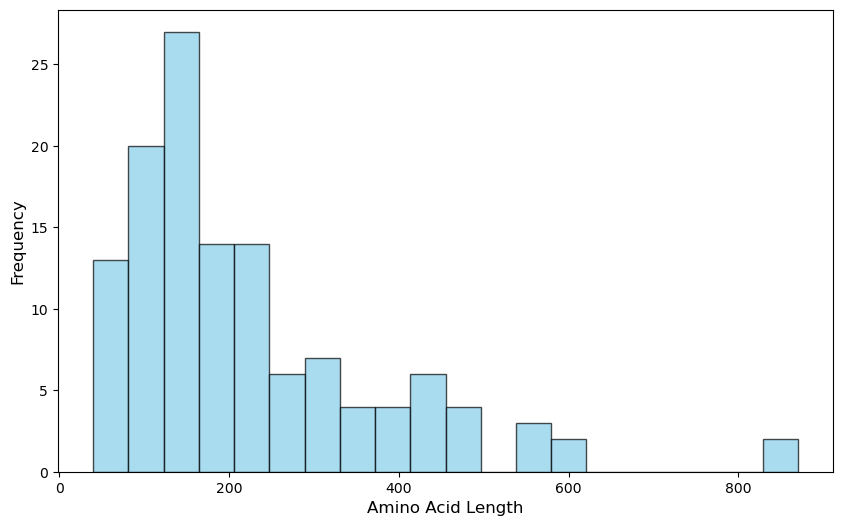

In [ ]:
from datapreprocess import protein_length_distribution
in_csv = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-train.csv'
out_png = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/png/small-resilength.png'

protein_length_distribution(in_csv,out_png)

### 548-Code : Making .npy
- train
    >```
    >python -m scripts.prep_sims \
    >    --split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-train.csv \
    >    --sim_dir /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/dataset \
    >    --outdir /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/548-npy \
    >    --num_workers 4 \
    >    --stride 40 \
    >    --atlas
    >```

- validation
    >```val
    >python -m scripts.prep_sims \
    >    --split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-val.csv \
    >    --sim_dir /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/dataset \
    >    --outdir /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/548-npy \
    >    --num_workers 4 \
    >    --stride 40 \
    >    --atlas
    >```

In [ ]:
# 這邊要在雙重確認 因為有些protein可能做不出npy 所以要把那些做不出npy的protein踢出csv list中
import os 
import pandas as pd
npy = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/548-npy'
csv = '/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-train.csv'
protein = ['_'.join(x.split('_')[:2]) for x in os.listdir(npy)]
print(protein)
df = pd.read_csv(csv,sep=',')
df = df[df['name'].isin(protein)]
df.to_csv(csv, index=False)

In [ ]:
# check .npy contents  
import numpy as np
data = np.load("/mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/548-npy/1a62_A.npy")
print(data.shape) # (1001, 130, 14, 3)
print(data) 
  

# 06-Model

## 64-code practice

### 644-pipeline : MDGen model(train)
- [mdgen_model.md](/mnt/hdd/jeff/mdgen-teaching/bin/mdgen_model.md)


### 645-presentation : Flow matching interpolation

#### Conditional probability path

In [3]:
# get ca xyz(t)
from model_ import extract_ca_coordinates
pdb = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/645-flowmatching/pdbxtc/WT.pdb'
xtc = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/645-flowmatching/pdbxtc/WT.xtc'

ca = extract_ca_coordinates(pdb,xtc)

In [4]:
print(ca.shape)

(250, 188, 3)


In [ ]:
# ca -> ca=(1-t)gauss+t ca
from model_ import mix_with_gauss
from model_ import perform_pca
import numpy as np
ca2 =[]
for j in range(11):
    for i in range(100):
        ca2.append(mix_with_gauss(ca[::40],j*0.1)) # frame = 250, ca[:]=ca[0:249], ca[::40]=ca[0:249:40] 0 40 80 120 160 200 240
ca2 = np.array(ca2)
print(ca2.shape)
ca3=perform_pca(ca2)

(1100, 7, 188, 3)


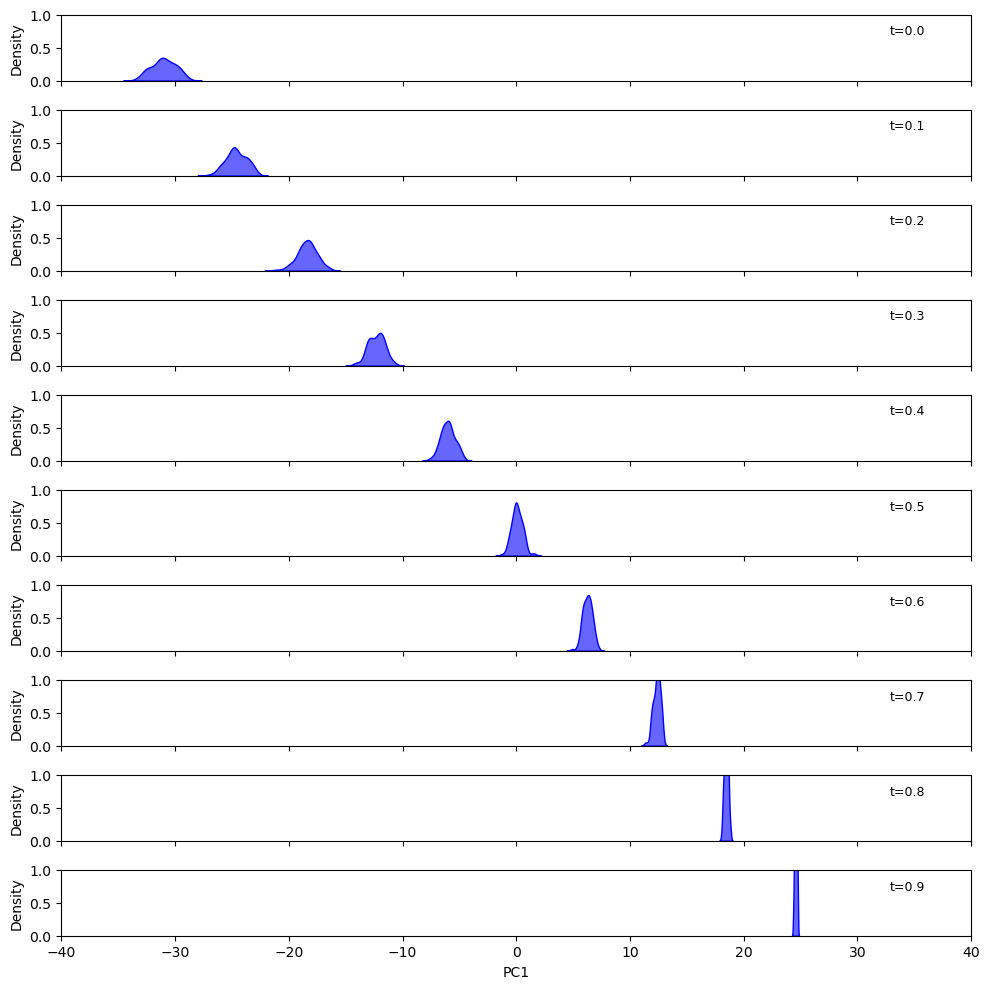

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ca2_np = np.array(ca3)

fig, axes = plt.subplots(10, 1, figsize=(10, 10))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]
    x = ca2_np[100*i:100*(i+1), 0]
    
    sns.kdeplot(x, ax=ax, fill=True, color='blue', alpha=0.6)
    
    ax.set_xlim(-40, 40)
    ax.set_ylim(0, 1)

    # 將 diffusion time 顯示在圖內右上角
    ax.text(
        0.95, 0.85, f't={i*0.1:.1f}', 
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=9, color='black'
    )

    # 只在最後一張顯示 X label
    if i < 9:
        ax.set_xlabel('')
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('PC1')

    ax.set_ylabel('Density')

plt.tight_layout()
plt.savefig(
    '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/645-flowmatching/conditional/diffusion_distribution-x-kde.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1
)
plt.show()


#### Marginal probability path

In [7]:
# get ca xyz(frame)
from model_ import extract_ca_coordinates
protein_name = ['WT','E521A','D614A','D562A','D491A','D498A']
pdbs = [f'/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/645-flowmatching/pdbxtc/{protein}.pdb' for protein in protein_name]
xtcs = [f'/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/645-flowmatching/pdbxtc/{protein}.xtc' for protein in protein_name]

cas=[]
for i in range(len(protein_name)):
    cas.append(extract_ca_coordinates(pdbs[i],xtcs[i]))

In [8]:
# ca -> ca=(1-t)gauss+t ca
from model_ import mix_with_gauss
from model_ import perform_pca

diffusion_list=[]
ca2 =[]
sample_num = 80
for diffusion_time in range(11):
    for protein in range(len(protein_name)): 
        for sample in range(sample_num):
            ca2.append(mix_with_gauss(cas[protein][::40],diffusion_time*0.1)) 
ca2 = np.array(ca2)
diffusion_list.append(perform_pca(ca2))

In [ ]:
import numpy as np
print(np.array(diffusion_list).shape)

(1, 5280, 2)


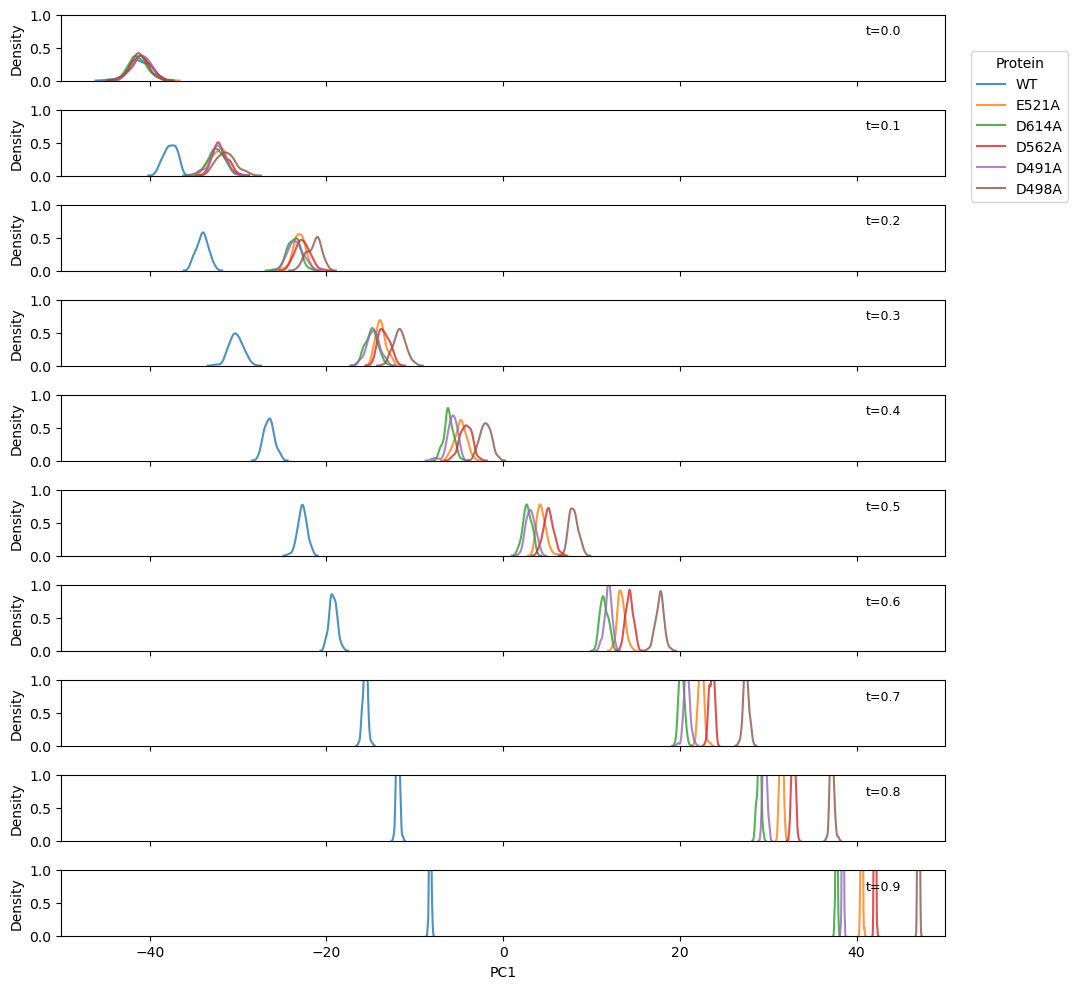

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ca2_np = np.array(diffusion_list)
print(ca2_np.shape)
c = plt.cm.tab10.colors[:len(protein_name)]

fig, axes = plt.subplots(10, 1, figsize=(10, 10))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]
    for p in range(len(protein_name)):
        start = p * sample_num + i * len(protein_name) * sample_num
        end   = (p+1) * sample_num + i * len(protein_name) * sample_num
        x = ca2_np[0, start:end, 0]

        sns.kdeplot(x, ax=ax, fill=False, color=c[p], alpha=0.8, label=f'{protein_name[p]}')

    # 統一範圍
    ax.set_xlim(-50, 50)
    ax.set_ylim(0, 1)

    # 把 diffusion time 放在圖內右上角
    ax.text(
        0.95, 0.85, f't={i*0.1:.1f}', 
        transform=ax.transAxes, 
        ha='right', va='top', 
        fontsize=9, color='black'
    )

    # 移除上方9張的X軸標籤與刻度
    if i < 9:
        ax.set_xlabel('')
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('PC1')

    ax.set_ylabel('Density')
    ax.legend().remove()

# 全域 legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.08, 0.95), title='Protein')

plt.tight_layout()
plt.subplots_adjust(right=0.95)

plt.savefig(
    '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/645-flowmatching/marginal/diffusion_distribution-x-kde.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1
)
plt.show()


### 646-Mapping : IPA

#### origin

1. making .npy
    >```
    >python -m scripts.prep_sims \
    >    --split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/a-csv/test.csv \
    >    --sim_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/a-pdbxtc \
    >    --outdir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/b-npy \
    >    --num_workers 4 \
    >    --stride 40 \
    >    --atlas
    >```

1. making folder
    >```
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/d-ipa-npy
    >```
1. inference
    >```
    >python sim_inference.py \
    >--sim_ckpt ckpt/atlas.ckpt \
    >--data_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/b-npy \
    >--num_frames 250 \
    >--num_rollouts 1 \
    >--split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/a-csv/test.csv \
    >--out_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/c-inference \
    >--xtc \
    >--ipa_feature /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/d-ipa-npy
    >```

In [11]:
import numpy as np

arr = np.load("/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/d-ipa-npy/0.0.npy")
print(type(arr))
print(arr.shape)


<class 'numpy.ndarray'>
(1, 70, 384)


In [12]:
from model_ import plot_npy_contour
import os 

npy_dir = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/d-ipa-npy'
png_dir = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/d-png'
os.makedirs(png_dir,exist_ok=True)
for npy in os.listdir(npy_dir):
    npy = os.path.join(npy_dir,npy)
    png = os.path.join(png_dir,os.path.basename(npy).replace('.npy','.png'))
    plot_npy_contour(npy, png)

print(len(os.listdir(png_dir)))


37


In [ ]:
import os
import subprocess
import shutil
import tempfile

def images_to_gif_ffmpeg(png_dir, output_gif, fps=10):
    os.makedirs(os.path.dirname(output_gif), exist_ok=True)

    # 取得 PNG
    files = [f for f in os.listdir(png_dir) if f.endswith(".png")]
    if not files:
        raise ValueError(f"No PNG files found in {png_dir}")

    try:
        files_sorted = sorted(files, key=lambda x: float(os.path.splitext(x)[0]))
    except ValueError:
        files_sorted = sorted(files)

    # 建立暫時資料夾並重新命名成序列
    temp_dir = tempfile.mkdtemp(prefix="gif_")
    for i, name in enumerate(files_sorted):
        shutil.copy(os.path.join(png_dir, name),
                    os.path.join(temp_dir, f"{i:05d}.png"))

    pattern = os.path.join(temp_dir, "%05d.png")

    cmd = [
        "ffmpeg", "-y",
        "-framerate", str(fps),
        "-i", pattern,
        "-vf", "scale=iw:ih:flags=bicubic",
        "-loop", "0",
        output_gif
    ]

    # 執行並顯示錯誤（若有）
    result = subprocess.run(cmd, capture_output=True, text=True)
    if result.returncode != 0:
        print(result.stderr)
        raise RuntimeError("FFmpeg command failed")

    shutil.rmtree(temp_dir)


# === Example usage ===
png_dir = "/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/d-png"
out_gif = "/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/d-gif/rotate.gif"
os.makedirs(os.path.dirname(out_gif), exist_ok=True)
images_to_gif_ffmpeg(png_dir, out_gif, fps=8)


#### rotate
- 這邊就是我們要把在origin使用的protein旋轉90度 然後看ipa feature有沒有一模一樣
- 你們可以用pymol畫畫看 出來的protein有沒有是相差90度的

In [ ]:
# rotate protein
from model_ import rotate_trajectory
in_pdb = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/a-pdbxtc/6pce_B/6pce_B.pdb'
in_xtc = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/a-pdbxtc/6pce_B/6pce_B_prod_R1_fit.xtc'
out_pdb = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/a-pdbxtc/6pce_B/6pce_B.pdb'
out_xtc = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/a-pdbxtc/6pce_B/6pce_B.xtc'
rotate_trajectory(in_pdb,in_xtc,out_pdb,out_xtc)

1. making .npy
    >```
    >python -m scripts.prep_sims \
    >    --split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/a-csv/test.csv \
    >    --sim_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/a-pdbxtc \
    >    --outdir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/b-npy \
    >    --num_workers 4 \
    >    --stride 40 \
    >    --atlas
    >```
1. making folder
    >```
    >mkdir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/d-ipa-npy
    >```
1. inference
    >```
    >python sim_inference.py \
    >--sim_ckpt ckpt/atlas.ckpt \
    >--data_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/b-npy \
    >--num_frames 250 \
    >--num_rollouts 1 \
    >--split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/a-csv/test.csv \
    >--out_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/c-inference \
    >--xtc \
    >--ipa_feature /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/d-ipa-npy
    >```

In [ ]:
# output png
from model_ import plot_npy_contour
import os 

npy_dir = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/d-ipa-npy'
png_dir = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/d-png'
os.makedirs(png_dir,exist_ok=True)
for npy in os.listdir(npy_dir):
    npy = os.path.join(npy_dir,npy)
    png = os.path.join(png_dir,os.path.basename(npy).replace('.npy','.png'))
    plot_npy_contour(npy, png)
print(len(os.listdir(png_dir)))

In [ ]:
import os
import subprocess
import shutil
import tempfile

def images_to_gif_ffmpeg(png_dir, output_gif, fps=10):
    """
    最簡單乾淨版：直接用 FFmpeg 將連續 PNG 合成 GIF。
    無 palettegen、無複雜濾鏡，適用所有版本。
    """

    os.makedirs(os.path.dirname(output_gif), exist_ok=True)

    # 取得 PNG
    files = [f for f in os.listdir(png_dir) if f.endswith(".png")]
    if not files:
        raise ValueError(f"No PNG files found in {png_dir}")

    try:
        files_sorted = sorted(files, key=lambda x: float(os.path.splitext(x)[0]))
    except ValueError:
        files_sorted = sorted(files)

    # 建立暫時資料夾並重新命名成序列
    temp_dir = tempfile.mkdtemp(prefix="gif_")
    for i, name in enumerate(files_sorted):
        shutil.copy(os.path.join(png_dir, name),
                    os.path.join(temp_dir, f"{i:05d}.png"))

    pattern = os.path.join(temp_dir, "%05d.png")

    cmd = [
        "ffmpeg", "-y",
        "-framerate", str(fps),
        "-i", pattern,
        "-vf", "scale=iw:ih:flags=bicubic",
        "-loop", "0",
        output_gif
    ]

    # 執行並顯示錯誤（若有）
    result = subprocess.run(cmd, capture_output=True, text=True)
    if result.returncode != 0:
        print(result.stderr)
        raise RuntimeError("FFmpeg command failed")

    shutil.rmtree(temp_dir)


# === Example usage ===
png_dir = "/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/d-png"
out_gif = "/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/rotate/d-gif/rotate.gif"

images_to_gif_ffmpeg(png_dir, out_gif, fps=8)


#### other protein

1. making .npy
    >```
    >python -m scripts.prep_sims \
    >    --split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/a-csv/test.csv \
    >    --sim_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/a-pdbxtc \
    >    --outdir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/b-npy \
    >    --num_workers 4 \
    >    --stride 40 \
    >    --atlas
    >```

1. inference
    >```
    >python sim_inference.py \
    >--sim_ckpt ckpt/atlas.ckpt \
    >--data_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/b-npy \
    >--num_frames 250 \
    >--num_rollouts 1 \
    >--split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/a-csv/test.csv \
    >--out_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/c-inference \
    >--xtc
    >--ipa_feature /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/d-ipa-npy
    >```

In [ ]:
from model_ import plot_npy_contour
import os 

npy_dir = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/d-ipa-feature'
png_dir = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/d-png'
os.makedirs(png_dir,exist_ok=True)
for npy in os.listdir(npy_dir):
    npy = os.path.join(npy_dir,npy)
    png = os.path.join(png_dir,os.path.basename(npy).replace('.npy','.png'))
    plot_npy_contour(npy, png)

print(len(os.listdir(png_dir)))

In [ ]:
import os
import subprocess
import shutil
import tempfile

def images_to_gif_ffmpeg(png_dir, output_gif, fps=10):
    """
    最簡單乾淨版：直接用 FFmpeg 將連續 PNG 合成 GIF。
    無 palettegen、無複雜濾鏡，適用所有版本。
    """

    os.makedirs(os.path.dirname(output_gif), exist_ok=True)

    # 取得 PNG
    files = [f for f in os.listdir(png_dir) if f.endswith(".png")]
    if not files:
        raise ValueError(f"No PNG files found in {png_dir}")

    try:
        files_sorted = sorted(files, key=lambda x: float(os.path.splitext(x)[0]))
    except ValueError:
        files_sorted = sorted(files)

    # 建立暫時資料夾並重新命名成序列
    temp_dir = tempfile.mkdtemp(prefix="gif_")
    for i, name in enumerate(files_sorted):
        shutil.copy(os.path.join(png_dir, name),
                    os.path.join(temp_dir, f"{i:05d}.png"))

    pattern = os.path.join(temp_dir, "%05d.png")

    cmd = [
        "ffmpeg", "-y",
        "-framerate", str(fps),
        "-i", pattern,
        "-vf", "scale=iw:ih:flags=bicubic",
        "-loop", "0",
        output_gif
    ]

    # 執行並顯示錯誤（若有）
    result = subprocess.run(cmd, capture_output=True, text=True)
    if result.returncode != 0:
        print(result.stderr)
        raise RuntimeError("FFmpeg command failed")

    shutil.rmtree(temp_dir)


# === Example usage ===
png_dir = "/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/d-png"
out_gif = "/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/other/d-gif/rotate.gif"
os.makedirs(os.path.dirname(out_gif), exist_ok=True)
images_to_gif_ffmpeg(png_dir, out_gif, fps=8)


### 646-Mapping : DTA

You need to run following code to inference DTA mapping
1. making .npy
    >```
    >python -m scripts.prep_sims \
    >    --split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/a-csv/test.csv \
    >    --sim_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/a-pdbxtc \
    >    --outdir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/b-npy \
    >    --num_workers 4 \
    >    --stride 40 \
    >    --atlas
    >```

1. making folder
    >```
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/c-inference
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/d-dta-npy
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/d-gif
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/d-png
    >```

1. inference
    >```
    >python sim_inference.py \
    >--sim_ckpt ckpt/atlas.ckpt \
    >--data_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/b-npy \
    >--num_frames 250 \
    >--num_rollouts 1 \
    >--split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/a-csv/test.csv \
    >--out_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/c-inference \
    >--xtc \
    >--teaching_dta /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/d-dta-npy
    >```

In [ ]:
import numpy as np

arr = np.load("/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/d-dta-npy/0.0.npy")
print(type(arr))
print(arr.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_npy_heatmaps(npy_path, out_dir=None):
    """
    讀取 shape=(1,250,70,384) 的 npy，並輸出：
      - frame.png : frame × feature 熱圖
      - resi.png  : residue × feature 熱圖
    """

    arr = np.load(npy_path)  
    if arr.ndim != 4:
        raise ValueError(f"Expected array shape (1, T, L, C), got {arr.shape}")

    arr = arr[0] 
    T, L, C = arr.shape

    if out_dir is None:
        out_dir = os.path.dirname(npy_path)
    os.makedirs(out_dir, exist_ok=True)

    # --- frame.png: 對每個 frame 平均 residue → (250,384)
    frame_mat = arr.mean(axis=1)

    plt.figure(figsize=(12, 6))
    plt.imshow(frame_mat, aspect='auto', cmap='viridis')
    plt.colorbar(label='Feature value')
    plt.xlabel('Feature index (384)')
    plt.ylabel('Frame index (250)')
    plt.title('Frame × Feature Heatmap')
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, "frame.png"), dpi=300)
    plt.close()

    # --- resi.png: 對每個 residue 平均 frame → (70,384)
    resi_mat = arr.mean(axis=0)

    plt.figure(figsize=(12, 6))
    plt.imshow(resi_mat, aspect='auto', cmap='viridis')
    plt.colorbar(label='Feature value')
    plt.xlabel('Feature index (384)')
    plt.ylabel('Residue index (70)')
    plt.title('Residue × Feature Heatmap')
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, "resi.png"), dpi=300)
    plt.close()

npy = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/d-dta-npy/0.0.npy'
png = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-dta/d-png'
plot_npy_heatmaps(npy,png)


## 65-homework

### 65-Q1
- 這邊以綠色1號為範例 主要要改的地方是[latent_model](/mnt/hdd/jeff/mdgen-teaching/mdgen/model/latent_model.py)
- 可以用##### mdgen-teaching 65-Q1 #####搜尋

1. making .npy
    >```
    >python -m scripts.prep_sims \
    >    --split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/a-csv/test.csv \
    >    --sim_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/a-pdbxtc \
    >    --outdir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/b-npy \
    >    --num_workers 4 \
    >    --stride 40 \
    >    --atlas
    >```

1. inference
    >```
    >python sim_inference.py \
    >--sim_ckpt ckpt/atlas.ckpt \
    >--data_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/b-npy \
    >--num_frames 250 \
    >--num_rollouts 1 \
    >--split /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/a-csv/test.csv \
    >--out_dir /mnt/hdd/jeff/mdgen-teaching/output/06-model/64-code/646-ipa/origin/c-inference \
    >--xtc \
    >--teaching_ipa /mnt/hdd/jeff/mdgen-teaching/output/06-model/65-homework/Q1/d-ipa-npy
    >```

In [ ]:
import numpy as np

arr = np.load("/mnt/hdd/jeff/mdgen-teaching/output/06-model/65-homework/Q1/d-ipa-npy/0.0.npy")
print(type(arr))
print(arr.shape)


In [ ]:
from model_ import plot_npy_contour
import os 

npy_dir = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/65-homework/Q1/d-ipa-npy'
png_dir = '/mnt/hdd/jeff/mdgen-teaching/output/06-model/65-homework/Q1/d-png'
os.makedirs(png_dir,exist_ok=True)
for npy in os.listdir(npy_dir):
    npy = os.path.join(npy_dir,npy)
    png = os.path.join(png_dir,os.path.basename(npy).replace('.npy','.png'))
    plot_npy_contour(npy, png)

print(len(os.listdir(png_dir)))


### 65-Q4 : Training, basic
```
python train.py \
--sim_condition \
--train_split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-train.csv \
--val_split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-val.csv \
--data_dir /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/548-npy \
--num_frames 250 \
--batch_size 1 \
--prepend_ipa \
--crop 59 \
--val_repeat 25 \
--epochs 1 \
--atlas \
--ckpt_freq 1 \
--suffix _fit \
--run_name basic
```

### 65-Q4 : Training, without ipa
```
python train.py \
--sim_condition \
--train_split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-train.csv \
--val_split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-val.csv \
--data_dir /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/548-npy \
--num_frames 50 \
--batch_size 1 \
--crop 15 \
--val_repeat 25 \
--epochs 1 \
--atlas \
--ckpt_freq 1 \
--suffix _fit \
--run_name withoug_ipa
```

### 65-Q4 : Training, GVP

```
python train.py \
--sim_condition \
--train_split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-train.csv \
--val_split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-val.csv \
--data_dir /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/548-npy \
--num_frames 50 \
--prepend_ipa \
--batch_size 1 \
--crop 15 \
--val_repeat 25 \
--epochs 1 \
--atlas \
--ckpt_freq 1 \
--suffix _fit \
--run_name GVP \
--path-type GVP
```

### 65-Q4 : Training, VP

```
python train.py \
--sim_condition \
--train_split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-train.csv \
--val_split /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/547-small_dataset/csv/small-val.csv \
--data_dir /mnt/hdd/jeff/mdgen-teaching/output/05-data_preprocess/54-code/548-npy \
--num_frames 50 \
--prepend_ipa \
--batch_size 1 \
--crop 15 \
--val_repeat 25 \
--epochs 1 \
--atlas \
--ckpt_freq 1 \
--suffix _fit \
--run_name VP \
--path-type VP
```

# 07-testing and evaluation


## 074-homework

### 074-Q2-test and evaluation
- i use reproduction ckpt as example, you need to change to Linear / GVP / VP / with IPA / without IPA ckpt

1. download ATLAS test set
    >```
    >cd /mnt/hdd/jeff/mdgen-teaching/bin
    >./atlas-test.sh
    >```

1. making .npy
    >```
    >python -m scripts.prep_sims \
    >    --split /mnt/hdd/jeff/mdgen-teaching/splits/atlas_test.csv \
    >    --sim_dir /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/a-atlas \
    >    --outdir /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/b-npy \
    >    --num_workers 4 \
    >    --stride 40 \
    >    --atlas
    >```

1. inference 
    >```
    >python sim_inference.py \
    >--sim_ckpt ckpt/atlas.ckpt \
    >--data_dir /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/b-npy \
    >--num_frames 250 \
    >--num_rollouts 1 \
    >--split /mnt/hdd/jeff/mdgen-teaching/splits/atlas_test.csv \
    >--out_dir /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/c-inference \
    >--xtc
    >```
    - 可能會有error 原因是記憶空間不足 要記錄一下原因
    - [ERROR] Failed on 7p41_D: CUDA out of memory. Tried to allocate 3.00 GiB. GPU 0 has a total capacity of 7.60 GiB of which 2.71 GiB is free. Including non-PyTorch memory, this process has 4.87 GiB memory in use. Of the allocated memory 3.22 GiB is allocated by PyTorch, and 1.50 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


1. evaluation
    >```
    >python scripts/analyze_ensembles.py \
    >--atlas_dir /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/a-atlas \
    >--pdbdir /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/c-inference \
    >--ca_only \
    >--num_workers 4
    >```

### 074-Q3-plot ca_xyz(diffusion_time)

- you should find #### mdgen-teaching 074-Q3######## in 
[sim_inference](/mnt/hdd/jeff/mdgen-teaching/sim_inference.py) and [wrapper](/mnt/hdd/jeff/mdgen-teaching/mdgen/wrapper.py)
and modify code in that block to get different diffusion time using 'euler' integrate method
- in [sim_inference](/mnt/hdd/jeff/mdgen-teaching/sim_inference.py)
    1. you need to change the model_args.sampling_method, using 'euler'
    1. you need to add parameter 'teaching_testing' in add_keys so that the following code you can run
- in [wrapper](/mnt/hdd/jeff/mdgen-teaching/mdgen/wrapper.py)
    1. you need to change here, from -1 to diffusion_time, so that you can get different diffusion_time samples. 
        >```
        >samples = sample_fn(
        >    zs,
        >    partial(self.model.forward_inference, **prep['model_kwargs'])
        >)[-1]
        >```
        setting diffusion_time=[0,0.3,0.5,0.9,1]
    1. you need to  modify the code here to save diffusion time npy and get atom coordinate
        >```
        >np.save(f"{self.args.teaching_testing}/{diffusion_time}.npy", atom14.detach().cpu().numpy())
        >```


- making folder
    >```
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-ca_xyz/c-inference
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-ca_xyz/c-npy
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-ca_xyz/d-png
    >mkdir -p /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-ca_xyz/d-gif
    >```

- inference to get ca_xyz[diffusion_time]
    >```
    >python sim_inference.py \
    >--sim_ckpt ckpt/atlas.ckpt \
    >--data_dir /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-ca_xyz/b-npy \
    >--num_frames 250 \
    >--num_rollouts 1 \
    >--split /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-ca_xyz/a-csv/test.csv \
    >--out_dir /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-ca_xyz/c-inference \
    >--xtc \
    >--teaching_testing /mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/c-npy
    >```

In [ ]:
import os
from testing_ import save_ca_xyz_3d_png

npy = '/mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/c-npy'
png = '/mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/d-png'

for i in [0,20,40,49]:
    npy_file = os.path.join(npy,f'diffusion_{i}.npy')
    png_fold = os.path.join(png,str(i))
    os.makedirs(png_fold,exist_ok=True)
    axis_range=(10,40,5,60,15,35)
    arr = np.load(npy_file)
    arr = arr[0]
    for j in range(arr.shape[0]):
        png_file = os.path.join(png_fold,f'{j}.png')
        save_ca_xyz_3d_png(arr[j],png_file,axis_range=axis_range)

In [ ]:
from testing_ import images_to_gif_ffmpeg
# === Example usage ===
png_dir = "/mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/d-png"
gif_dir = "/mnt/hdd/jeff/mdgen-teaching/output/07-testing/074-test_evaluation/d-gif"

for i in [0,20,40,49]:
    png_subdir = os.path.join(png_dir,str(i))
    gif_file = os.path.join(gif_dir,f'{i}.gif')

    images_to_gif_ffmpeg(png_subdir, gif_file , fps=20)